# High Order Interval Fuzzy Time Series

SILVA, Petrônio CL; SADAEI, Hossein Javedani; GUIMARÃES, Frederico Gadelha. Interval Forecasting with Fuzzy Time Series.
In: Computational Intelligence (SSCI), 2016 IEEE Symposium Series on. IEEE, 2016. p. 1-8.

In [1]:
import matplotlib.pylab as plt
from pyFTS.benchmarks import benchmarks as bchmk
from pyFTS.models import ifts

from pyFTS.common import Transformations
tdiff = Transformations.Differential(1)

%pylab inline

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
from pyFTS.data import Enrollments

enrollments = Enrollments.get_data()

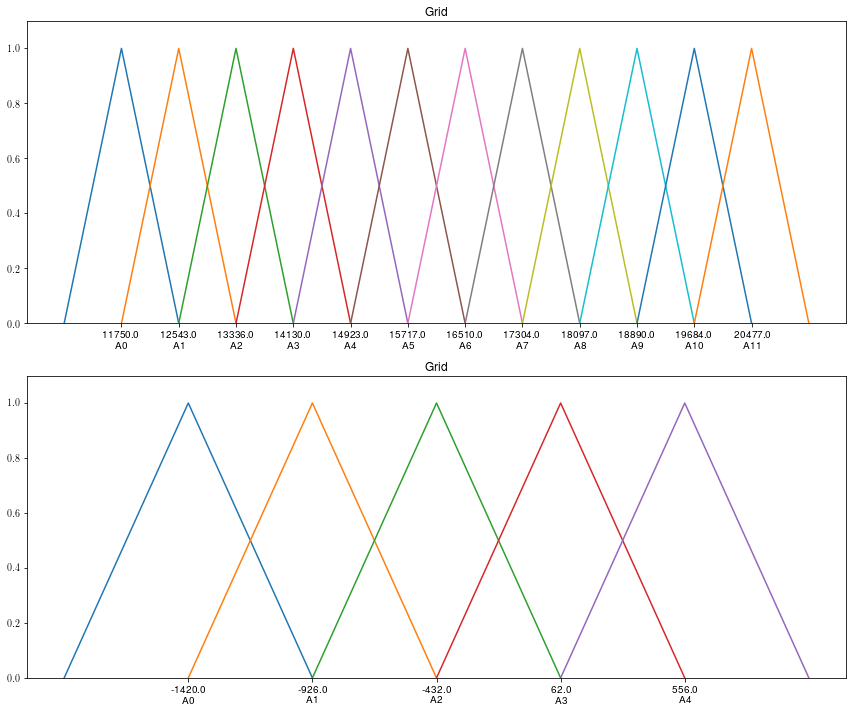

In [3]:
from pyFTS.partitioners import Grid, Util as pUtil

fuzzy_sets = Grid.GridPartitioner(data=enrollments, npart=12)
fuzzy_sets2 = Grid.GridPartitioner(data=enrollments, npart=5, transformation=tdiff)

pUtil.plot_partitioners(enrollments, [fuzzy_sets,fuzzy_sets2])

In [4]:
model1 = ifts.IntervalFTS("FTS", partitioner=fuzzy_sets)
model1.fit(enrollments, order=1)

print(model1)

[ 14:39:06] Start training
[ 14:39:06] Starting batch 1
[ 14:39:06] Finish batch 1
[ 14:39:06] Starting batch 2
[ 14:39:06] Finish batch 2
[ 14:39:06] Starting batch 3
[ 14:39:06] Finish batch 3
[ 14:39:06] Starting batch 4
[ 14:39:06] Finish batch 4
[ 14:39:06] Starting batch 5
[ 14:39:06] Finish batch 5
[ 14:39:06] Starting batch 6
[ 14:39:06] Finish batch 6
[ 14:39:06] Starting batch 7
[ 14:39:06] Finish batch 7
[ 14:39:06] Starting batch 8
[ 14:39:06] Finish batch 8
[ 14:39:06] Starting batch 9
[ 14:39:06] Finish batch 9
[ 14:39:06] Starting batch 10
[ 14:39:06] Finish batch 10
[ 14:39:06] Starting batch 11
[ 14:39:06] Finish batch 11
[ 14:39:06] Finish training
Interval FTS:
A1 -> A2,A3
A10 -> A10,A8,A9
A2 -> A2,A3,A4
A3 -> A2,A3,A4,A5
A4 -> A4,A5,A6
A5 -> A4,A5,A6,A7
A6 -> A4,A5,A6,A7,A8,A9
A7 -> A5,A6,A7,A8,A9
A8 -> A10,A9
A9 -> A10,A8,A9



In [5]:
model2 = ifts.IntervalFTS("FTS", partitioner=fuzzy_sets2)
model2.append_transformation(tdiff)
model2.fit(enrollments, order=1)

print(model1)

[ 14:39:07] Start training
[ 14:39:07] Starting batch 1
[ 14:39:07] Finish batch 1
[ 14:39:07] Starting batch 2
[ 14:39:07] Finish batch 2
[ 14:39:07] Starting batch 3
[ 14:39:07] Finish batch 3
[ 14:39:07] Starting batch 4
[ 14:39:07] Finish batch 4
[ 14:39:07] Starting batch 5
[ 14:39:07] Finish batch 5
[ 14:39:07] Starting batch 6
[ 14:39:07] Finish batch 6
[ 14:39:07] Starting batch 7
[ 14:39:07] Finish batch 7
[ 14:39:07] Starting batch 8
[ 14:39:07] Finish batch 8
[ 14:39:07] Starting batch 9
[ 14:39:07] Finish batch 9
[ 14:39:07] Starting batch 10
[ 14:39:07] Finish batch 10
[ 14:39:07] Starting batch 11
[ 14:39:07] Finish batch 11
[ 14:39:07] Finish training
Interval FTS:
A1 -> A2,A3
A10 -> A10,A8,A9
A2 -> A2,A3,A4
A3 -> A2,A3,A4,A5
A4 -> A4,A5,A6
A5 -> A4,A5,A6,A7
A6 -> A4,A5,A6,A7,A8,A9
A7 -> A5,A6,A7,A8,A9
A8 -> A10,A9
A9 -> A10,A8,A9



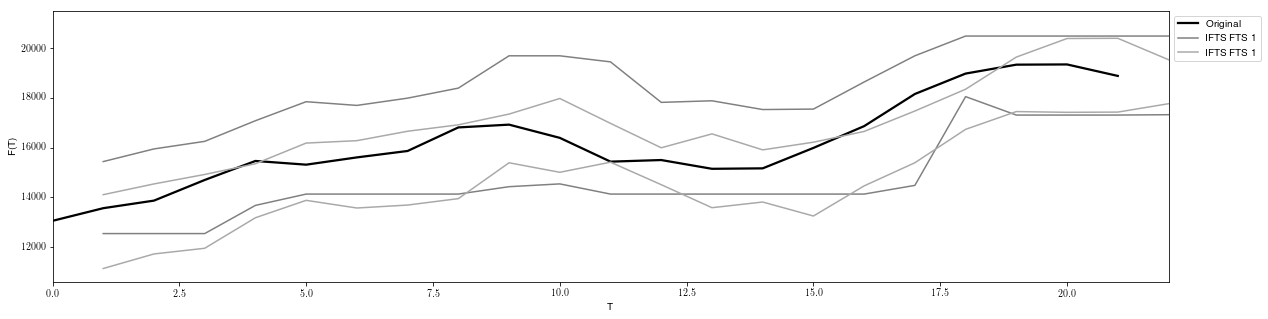

In [6]:
bchmk.plot_compared_series(enrollments, [model1, model2], bchmk.colors, 
                           points=False, intervals=True)

In [7]:
bchmk.print_interval_statistics(enrollments, [model1, model2])

Model	& Order     & Sharpness		& Resolution		& Coverage & .05  & .25 & .75 & .95	\\ 
IFTS FTS		& 1		& 3797.83		& 631.23		& 1.0        &88.61        &443.05        &514.01        &102.8\\ 
IFTS FTS		& 1		& 2436.2		& 491.02		& 0.81        &96.02        &480.08        &214.85        &105.31\\ 

